In [1]:
from nn import io

rap1_positives = io.read_text_file('./data/rap1-lieb-positives.txt')



In [6]:
print(rap1_positives)
print(len(rap1_positives))

['ACATCCGTGCACCTCCG', 'ACACCCAGACATCGGGC', 'CCACCCGTACCCATGAC', 'GCACCCATACATTACAT', 'ACATCCATACACCCTCT', 'ACACCCTTACACTTTTA', 'GCATCCGTGCCTCCCAC', 'AAACCCATGCACAGTGA', 'ACATCCGTGCACCATTT', 'ACACCCATACATACGGA', 'ACACCCACACCCCGGGC', 'ACCTCCGTACACCAATC', 'ACACCCATACATGTTGA', 'TGACCCATACATTTCCT', 'ACATCCGTACATCAGAA', 'AAACCCATACATATCTT', 'TCACCCAGTCATCCAAC', 'AGACCCACACACCGCAT', 'TAGCCCATACACCGCAG', 'ACACCCACACCCCTCAT', 'ACACCCACGCCCCGCAA', 'GAACCCACACCTCTCAC', 'GCACCCACACATCGCAT', 'AAATCCGTGCACCGCAT', 'AAACCCATGCACCTCCA', 'ACACCCATTCACCGCAC', 'ACATCCGTGCACTGTGG', 'ACATCCATACATTCGGT', 'ACACCCATACATTTATA', 'ACACCCAGACACCTCAA', 'GCACCCGTACCCCACAA', 'ACATCCGAACACCAAAT', 'ACACCCATACCTCTCAG', 'GCACCCGCACACCGCAG', 'ACACCCACACATTTACA', 'AAACCCATACAATATAT', 'ACATCCGTACACTTTTG', 'CCGCCCATACACCCCAT', 'GCACCCACACACCGGAC', 'ACACCCAAACATTAGGG', 'CCATCCATACATTTTGG', 'GCACCCATGCACCTCAC', 'GAACCCATTCACCACAT', 'CCATCCATACATGTTCA', 'ACACCCACACATATCTA', 'AAATCCGTACCTTTCCT', 'GAACCCACACACCACAC', 'AGACCCATACA

In [9]:
# variance bewteen seq lengths:

print(set([len(seq) for seq in rap1_positives]))

{17}


In [3]:
rap1_negatives = io.read_fasta_file('./data/yeast-upstream-1k-negative.fa')

In [8]:
print(rap1_negatives[1])
print(len(rap1_negatives))

CCAATTTGTCACCAGCTTCAGAAATGGTGTTCTTCAAAGAGTAAGCAATGGATTCCAATTGGTTCTTGGAAGCAATTCTTTGAGATTCCTTTTCATCTTCTTCCTTGAATTTTTCGGCTTCAGCAACCATCTTTTCGATATCTTCCTTGGACAATCTACCCTTGTCGTTGGTAATAGTGATCTTGTTAGACTTACCAGTACCCTTTTCGACGGCGGAAACATTCAAAATACCGTTAGAGTCGACATCGAAAGTGACTTCAATTTGTGGGACACCTCTTGGAGCTGGTGGAATACCACTCAATTCGAACTTACCCAACAAGTTGTTGTCCTTAGTCTTGGCTCTTTCACCTTCAAAGACTTGAATCAAGACACCTGGTTGGTTATCAGCATAAGTGGAAAAGATCTCGAACTTCTTTGTTGAAATGGTAGAGTTTCTTGGAATCAACTTGGTCATGACACCACCAGCAGTTTCAATACCCAAGGATAATGGAGCGACATCCAACAACAATAGATCTTGAGTCTTGGAAGATTCGTCACCAGTCAAAATAGCAGCTTGAACAGCAGCACCGTAAGCAACAGCTTCATCTGGGTTGATAGATCTGTTTGGTTCCTTACCGTTGAAGTAGTCAGTGACCAATTTTTGGACCTTTGGAATTCTGGTAGAACCACCGACCAAGACAATTTCATCGACTTGAGATTTGTCCAATTTAGCATCTCTCAAGACCTTTTCAACTGGGTCCAAAGTAGATCTGAACAAGTCAGCACACAATTCTTCGAATCTGGCTCTGGTGATGGAAGTGTAGAAATCGATACCTTCGAACAAAGAGTCAATTTCAACGGAAGTTTGAGCGGAGGAAGACAAAGTTCTCTTGGCTCTTTCACAAGCGGTTCTTAATCTTCTCAAAGCTCTTTGGTTGGTAGACAAGTCCTTCTTGTTCTTTCTCTTGAATTCTTGGATGAAGTGGTTGACCAATCTGTTGTCAAAATCTTCACCACCCAA

In [10]:
print(set([len(seq) for seq in rap1_negatives]))

{1000, 490, 334, 52, 629, 792}


In [21]:
# split negative sequences into size 17 (matching negative)

rap1_negatives_split = []
for seq in rap1_negatives:
    for i in range(0, len(seq), 17):
        rap1_negatives_split.append(seq[i:i+17])

rap1_negatives_split = [s for s in rap1_negatives_split if len(s) == 17]

In [16]:
print(set([len(seq) for seq in rap1_negatives_split]))

{17}


In [22]:
len(rap1_negatives_split)

183297

In [36]:
# upsample data

from nn import preprocess

X , y = preprocess.sample_seqs( rap1_positives + rap1_negatives_split ,
                                [1]*len(rap1_positives) + [0]*len(rap1_negatives_split))

In [38]:
# convert to one hot

for idx, seq in enumerate(X):
    X[idx] = preprocess.one_hot_encode_seqs(seq)

In [39]:
X[0]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

In [41]:
print(set([len(seq_one_hot) for seq_one_hot in X]))

print( 17 * 4 )

{68}
68


In [50]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# cast to np arrays, transpose to match nn (feature, batch) code
X_train, X_val, y_train, y_val = np.array(X_train).T, np.array(X_val).T, np.array(y_train), np.array(y_val)

In [51]:
for i in (X_train, X_val, y_train, y_val):
    print(i.shape)

(68, 293275)
(68, 73319)
(293275,)
(73319,)


In [70]:
from nn.nn import NeuralNetwork

nn_arch = [
    {'input_dim': 68, 'output_dim': 128, 'activation': 'relu'},
    {'input_dim': 128, 'output_dim': 64, 'activation': 'relu'},
    {'input_dim': 64, 'output_dim': 1, 'activation': 'sigmoid'}
]


classifier = NeuralNetwork(nn_arch=nn_arch, lr=5.0, seed=42, batch_size=100, epochs=300, loss_function='binary_cross_entropy')


train_loss, val_loss = classifier.fit(X_train, y_train, X_val, y_val)

Epoch 1  	Training Loss: 0.7208151436654644	Validation Loss: 0.7047028373108098
Epoch 2  	Training Loss: 0.704338226875035	Validation Loss: 0.6900106359841279
Epoch 3  	Training Loss: 0.6896564116288653	Validation Loss: 0.6766193829452353
Epoch 4  	Training Loss: 0.6762747937880869	Validation Loss: 0.6641916756722188
Epoch 5  	Training Loss: 0.6638548541243003	Validation Loss: 0.6523699203586402
Epoch 6  	Training Loss: 0.6520403566825739	Validation Loss: 0.6409086517939695
Epoch 7  	Training Loss: 0.6405846837687382	Validation Loss: 0.6296659524141586
Epoch 8  	Training Loss: 0.6293466615410892	Validation Loss: 0.6185489229225016
Epoch 9  	Training Loss: 0.6182345345497928	Validation Loss: 0.6074978743949059
Epoch 10  	Training Loss: 0.6071885409229761	Validation Loss: 0.5963520414417649
Epoch 11  	Training Loss: 0.5960468575384814	Validation Loss: 0.5850490409154075
Epoch 12  	Training Loss: 0.5847472838771488	Validation Loss: 0.5735951488873449
Epoch 13  	Training Loss: 0.5732980928

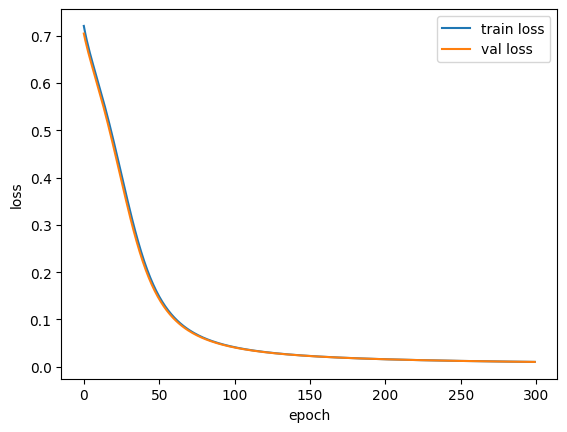

In [71]:
from matplotlib import pyplot as plt

plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [72]:
from sklearn.metrics import accuracy_score

y_val_prob = classifier.predict(X_val)
y_pred_label = (y_val_prob > 0.5).astype(int).T

y_pred_label = y_pred_label.squeeze()

accuracy = accuracy_score(y_val, y_pred_label)

print('Accuracy is:', round( accuracy ,4))


Accuracy is: 0.9983


In [ ]:
'''
*Explain why you chose the sampling scheme you did:*
I chose to upsample my data. Downsampling and upsampling each have pros and cons
The pros of using upsampling, which is what I chose, is that we get to use all of the data we have on deck.
The downside is that your upsampled labels will be over-represented... this is ok as long as your upsampled class
is well representative of your groud truth distribution. 



*Explain your choice of loss function and hyperparameters:*
I wanted to start with, which what I ended up going with, a simple NN. Input, two middle, and output.
Maybe I could've started with a simpler one... buth this seems to work well.
I played around with learning rate, and foudn 5 to be ok. I bet we can up it more, but 5 did the job.
I honestly don't have much intution on batch_size. I wanted for things not to run too slow, so I used 100.
I found loss stabilized at ~300, thus I stopped it there.
'''